*The Song of Insects* by Dr. G.W. Pierce describes measurements of the number of chirps per second for the striped ground cricket on several days. The air temperature in degrees farenheit was also recorded.

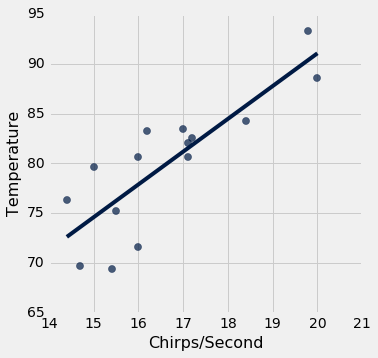

In [38]:
cricket = Table.read_table('cricket.csv')
cricket.scatter(0, 1, s=50, fit_line=True)

In [39]:
def describe(values, units):
    print(round(np.average(values)), units, 'with std. dev', round(np.std(values), 1))

describe(cricket.column(0), 'chirps/sec')
describe(cricket.column(1), 'degrees F ')

17.0 chirps/sec with std. dev 1.6
80.0 degrees F  with std. dev 6.5


In [30]:
def standard_units(any_numbers):
    return (any_numbers - np.average(any_numbers))/np.std(any_numbers)    

In [40]:
round(np.average(standard_units(cricket.column(0))*standard_units(cricket.column(1))), 1)

0.80000000000000004

In [41]:
-0.8 * 1.6

-1.2800000000000002

**Question 1.** Is the median temperature above or below the average temperature?

**Answer:** There is not enough information to tell.

When I first looked at this problem, I tilted my head left to look at the heights of the points.  Their distribution looks like it trails off toward higher values -- it looks right-tailed.  That would suggest the median is below the mean.  But in this case the visualization is misleading.

Instead, since there's a small number of points, you can just compute the median.  There are 15 points, so the median is the 8th-largest temperature.  That looks like it's a little less than 81 (actually 2 points are tied for the middle).

We're told in the cell below that the average temperature is 80.0 degrees.  But if you read the function `describe`, it reports the average temperature *rounded to the nearest degree*.  So the average temperature could be as much as 80.5 degrees or as little as 79.5 degrees.  Probably the median is a little bigger than that, but we can't be sure.

So the answer is really "the median is probably a bit above the mean," but a small unintended detail in the question meant we couldn't be sure.

**Question 2.** The correlation coefficient `r` and the slope of the regression line in original units are:

**Answer:** Different for this dataset.

You should think of `r` as the slope of the regression line in standard (not original) units.  The slope of the regression line in original units is always $r \times \frac{SD(Y)}{SD(X)}$.  (We just take `r` and convert it back to original units.)  So unless the predictor variable and the predicted variable have the same units and happen to have exactly the same spread (standard deviation), the slope won't equal the correlation coefficient.  In this case their standard deviations are 1.6 chirps/sec and 6.5 degrees F, respectively.

**Question 3.** According to the regression line, for every additional degree of temperature, crickets will chirp how many more times per day on average?

**Answer:** $0.8 \times \frac{1.6}{6.5}$.

Note first that "the regression line" here cannot refer to the regression line pictured in the plot.  That one is used for estimating the average temperature given a number of chirps per day.  It isn't intended to estimate the average number of chirps per day given the temperature.

And you get two different lines when you perform those two different regressions.  You can't just flip the axes and invert the slope.  One has slope $0.8 \times \frac{1.6}{6.5}$, and the other has slope $0.8 \times \frac{6.5}{1.6}$, which is not just the inverse of the first slope!

An easy way to remember this is by the extreme case.  Suppose two columns `X` and `Y` are completely uncorrelated.  Then the regression of `X` on `Y` should look like a flat (horizontal) line, if we plot `X` on the vertical axis and `Y` on the horizontal.  That's because our prediction for the average of `X` should be the same, regardless of the value of `Y`.  But the same is true for the regression of `Y` on `X`: plotting `Y` on the vertical axis, the line should look horizontal, since our prediction for the average of `Y` should be the same for every `X`.  Just flipping the axes would give us a vertical line instead of a horizontal one, which makes no sense!

Here's a plot of that:

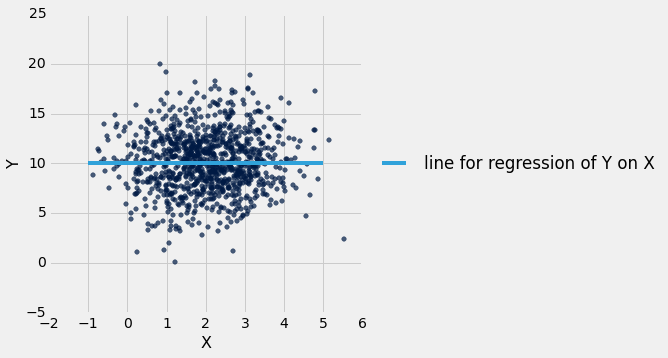

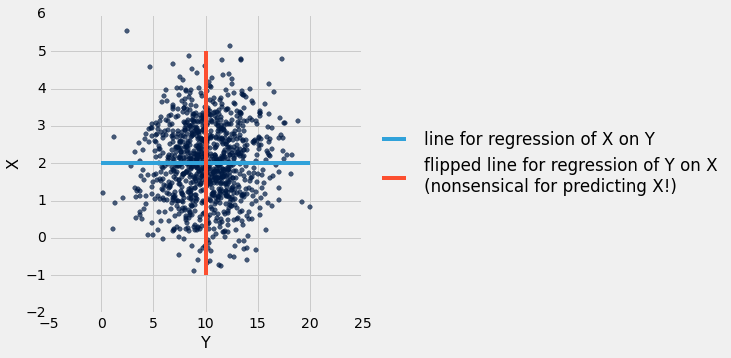

In [18]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

uncorrelated = Table().with_columns(["X", np.random.normal(2, size=1000), "Y", np.random.normal(10, 3, size=1000)])
uncorrelated.scatter(0)
plt.plot([-1, 5], [10, 10], label="line for regression of Y on X")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

uncorrelated.scatter(1)
plt.plot([0, 20], [2, 2], label="line for regression of X on Y")
plt.plot([10, 10], [-1, 5], label="flipped line for regression of Y on X\n(nonsensical for predicting X!)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Anyway, the slope of the regression line, regressing chirps on temperature, is $0.8 \times \frac{1.6}{6.5}$, so that's our answer.